<center>Заметка 5.б Морфологические библиотечные функции</center>
<center>курса <q>Введение в цифровую обработку изображений</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.09</center>

<center>Аннотация</center>
<p>
...
</p>

<p>Это предварительная версия! Любые замечания приветствуются.</p>

Импортируем необходимые библиотеки:

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_bin = np.load("./img_bin.npy") # загрузка изображения без шума

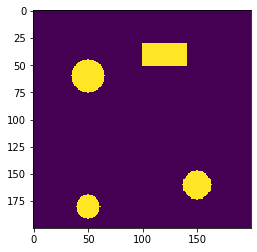

In [3]:
plt.imshow( img_bin, interpolation = 'none' ); # отрисовка изображения

<b>Добавим шум соль</b>

Шум соль это случайный набор белых пикселей.

In [4]:
img_salt = np.load("./img_salt.npy") # загрузка изображения с шумом

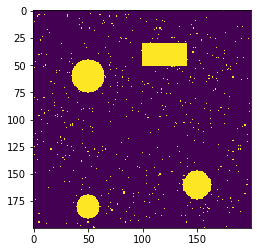

In [5]:
plt.imshow( img_salt, interpolation = 'none' );

<h2>Библиотечные функции</h2>

<b>Через морфологические операторы</b>

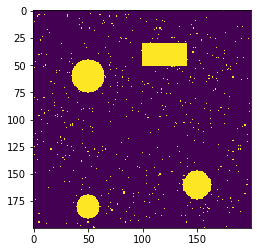

In [6]:
plt.imshow( img_salt, interpolation = 'none' );

Создаем трафарет для вырезания.\
Трафарет/ядро - это окно 3х3 из единиц.

In [7]:
kernel = np.ones((3,3),np.uint8)

Выполняем разъедание с указанным ядром и одной итерацией.

In [8]:
erosion = cv.erode(img_salt, kernel, iterations = 1)

Посмотрим, что получилось

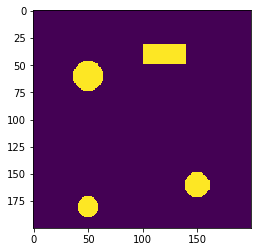

In [9]:
plt.imshow( erosion, interpolation = 'none' );

Как видно, данный оператор отлично справился с удалением шума.\
Но можно заметить, что все фигуры уменьшились.

Касательно значений в изображении.
Как и было до этого сказано, многие функции работают
(существует их расширение)
и с произвольными числами.

In [10]:
kernel = np.ones((3,3),np.uint8)*2
erosion = cv.erode(img_bin*7, kernel, iterations = 1)

In [11]:
# Тогда нащи числа будут так интерпретироватся.
np.unique( erosion )

array([0, 7], dtype=uint8)

Можно взять ядро побольше.

In [12]:
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img_bin,kernel,iterations = 1)

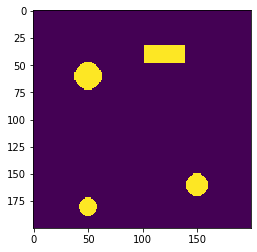

In [13]:
plt.imshow( erosion, interpolation = 'none' );

Из-за этого фигуры стали ещё меньше.\
Нужно быть осторожным, ведь можно удалить и сами элементы.

Добавим к изоражению квадрат 3х3

In [14]:
cv.rectangle( img_bin, (100, 125), (102,127), 1, -1);

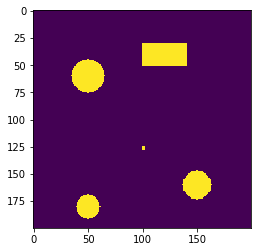

In [15]:
plt.imshow(img_bin, interpolation = 'none');

Выполним разъедание с ядром 5х5

In [16]:
erosion = cv.erode(img_bin,kernel,iterations = 1)

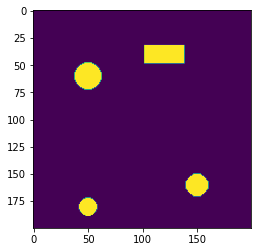

In [17]:
plt.imshow(erosion);

Как видно, маленький квадрат 3х3 исчез

Ещё можно увеличить количество итераций.

In [18]:
kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(img_salt,kernel,iterations = 5)

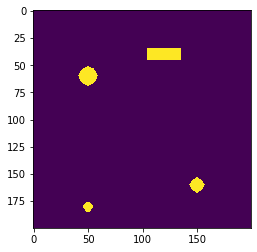

In [19]:
plt.imshow( erosion, interpolation = 'none' );

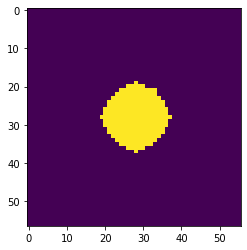

In [20]:
plt.imshow( erosion[32:89, 22:78] );

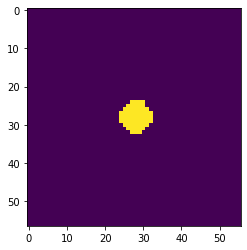

In [21]:
erosion = cv.erode(img_salt,kernel, iterations = 8)
plt.imshow( erosion[32:89, 22:78] );

Замечу, что от круга все больше и больше срезается "материи".

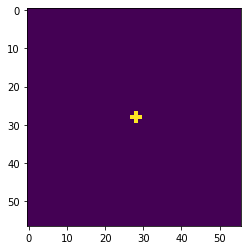

In [22]:
erosion = cv.erode(img_salt,kernel, iterations = 10)
plt.imshow( erosion[32:89, 22:78] );

Пока круг полностью не пропадет.

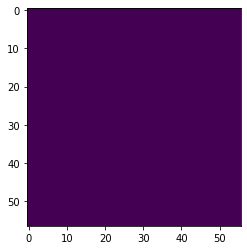

In [23]:
erosion = cv.erode(img_salt,kernel, iterations = 11)
plt.imshow( erosion[32:89, 22:78] );

Рассмотрим теперь в качестве шума черные точки

In [24]:
img_bin = np.load("./img_pepper.npy")

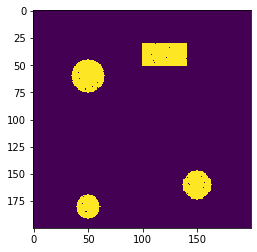

In [25]:
plt.imshow( img_bin, interpolation = 'none' );

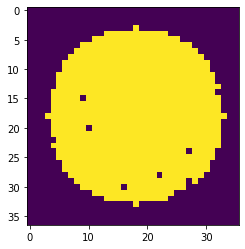

In [26]:
plt.imshow( img_bin[42:79, 32:68] );

Воспользуемся функцией cv.dilate, которая является аналогом cv.erode.\
Только вместо удаление пикслей, она наоборот их добаляет

In [27]:
kernel = np.ones((3,3),np.uint8)
dilate = cv.dilate(img_bin,kernel, iterations = 1)

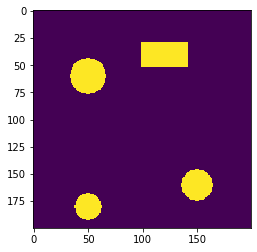

In [28]:
plt.imshow( dilate, interpolation = 'none' );

Видно, что черные дырочки затянулись.\
Но и сами объекты немного увеличились.

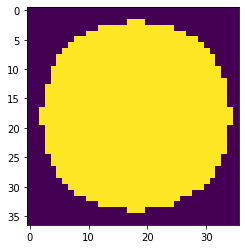

In [29]:
plt.imshow( dilate[42:79, 32:68] ); # посмотрим на фрагмент круга

<h3>Нотная граммота</h3>

Наша цель: из изображения извлечь ноты

In [30]:
notes = cv.imread("./data/notes.png", cv.IMREAD_COLOR)
notes.shape

(134, 1024, 3)

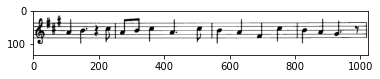

In [31]:
plt.imshow( notes );

In [32]:
gray = cv.cvtColor( notes, cv.COLOR_BGR2GRAY) # преобразуем цвета изображения в оттенки серого

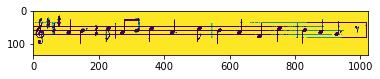

In [33]:
plt.imshow( gray, interpolation = 'none' );

(array([ 10608.,    341.,    504.,    294.,   3819.,    267.,    292.,
           440.,    353., 120298.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

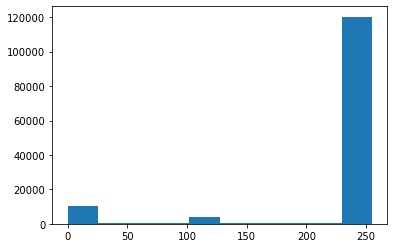

In [34]:
plt.hist( gray.flatten() )

In [35]:
np.unique( gray )

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [36]:
gray = cv.bitwise_not(gray) #инвертирование оттенков серого

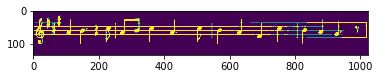

In [37]:
plt.imshow( gray, interpolation = 'none' );

Выполним бинаризацию изображение(в оттенах серого).\
Для этого используем функцию, которая сама ищет порог бинаризации. Пиксели, значения которых больше этого порога, становятся равными 1, оставшиеся становятся равными 0.

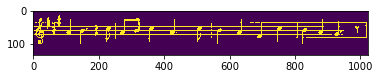

In [38]:
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, -2)
plt.imshow( bw, interpolation = 'none' );

In [39]:
np.unique( bw )

array([  0, 255], dtype=uint8)

Изображение бинарное, поэтому теперь можно применять морфологические операторы

In [40]:
horizontal = bw.copy()
vertical = bw.copy()

In [45]:
cols = horizontal.shape[1]
horizontal_size = cols // 30

horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1)) # ядро для выделения горизонтальных полос

In [42]:
horizontal_size

34

**Операция Open - это композиция erode и dilate (именно в таком порядке) с одним и тем же ядром**. \
erode убирает белый шум и снимает слой с фигур, а dilate убирает черные дырочки и добавляет слой к фигурам

Применим операцию open к изображению

In [46]:
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)

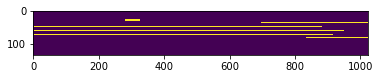

In [47]:
plt.imshow( horizontal, interpolation='none' );

In [48]:
rows = vertical.shape[0]
verticalsize = rows // 30

verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))# ядро для выделения вертикальных полос

In [49]:
verticalsize

4

In [50]:
vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)

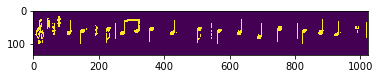

In [51]:
plt.imshow( vertical, interpolation = 'none' );

Видно, что линии ушли, и остались только ноты.

<h3>Монеты</h3>

Наша цель: на изображении посчитать количество монет.

In [52]:
img_coins = cv.imread('./data/water_coins.jpg')
img_coins.shape

(312, 252, 3)

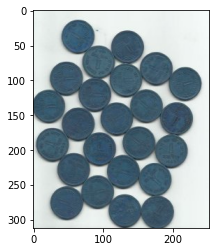

In [53]:
plt.imshow( img_coins );

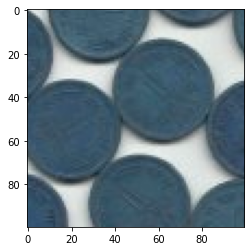

In [54]:
plt.imshow( img_coins[100:200,100:200:] );

Заметим, что монеты касаются друг друга

Переведем изображение в оттенки серого и проведем бинаризацию.

In [55]:
gray = cv.cvtColor(img_coins, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

(array([  114.,  2138., 34641.,  5354.,   890.,   952.,  1178.,  1800.,
         7045., 24512.]),
 array([ 32. ,  54.2,  76.4,  98.6, 120.8, 143. , 165.2, 187.4, 209.6,
        231.8, 254. ]),
 <BarContainer object of 10 artists>)

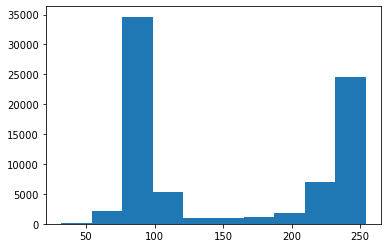

In [56]:
plt.hist( gray.flatten() )

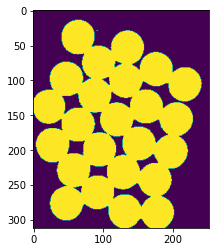

In [57]:
plt.imshow( thresh );

Возьмём ядро в форме эллипса размера 21х21

In [60]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (21,21) )

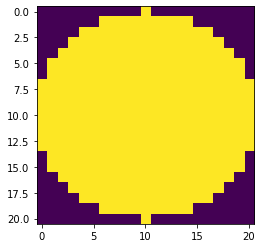

In [61]:
plt.imshow( kernel );

Применим разъедание с помощью этого ядра для отделения монет друг от друга

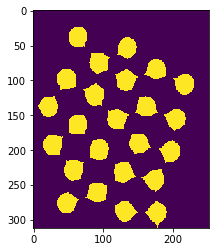

In [62]:
errode = cv.erode( thresh, kernel, iterations = 1)
plt.imshow( errode, interpolation = 'none'  );

Видно, что монеты теперь не касаются друг друга. \
Мы можем легко посчитать количество монет.

In [63]:
res, markers = cv.connectedComponents( errode ) # функция считает количество компонент 
markers.shape

(312, 252)

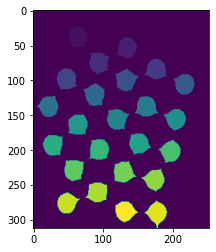

In [64]:
plt.imshow( markers );

In [65]:
res-1

24

<h2>bar code</h2>

In [66]:
image = cv.imread("./data/barcode/barcode_01.jpg")[:,:,::-1]
image.shape

(450, 600, 3)

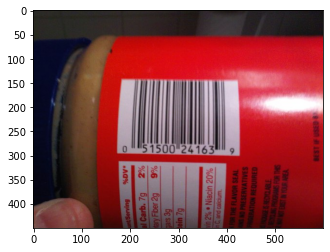

In [67]:
plt.imshow( image );

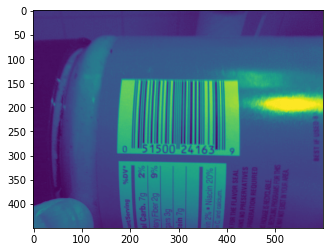

In [68]:
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
plt.imshow( gray );

In [69]:
# Считаем производные вдоль оси х и у
gradX = cv.Sobel(gray, ddepth = cv.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv.Sobel(gray, ddepth = cv.CV_32F, dx = 0, dy = 1, ksize = -1)

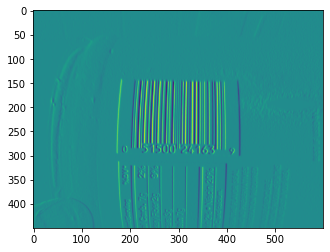

In [70]:
plt.imshow( gradX );

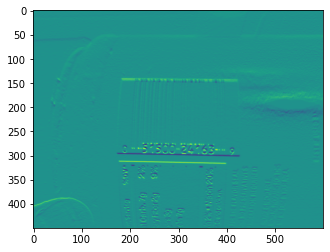

In [71]:
plt.imshow( gradY );

Хотим отделить на изображении характерные градиенты.

In [72]:
# subtract the y-gradient from the x-gradient
gradient = cv.subtract(gradX, gradY)
gradient = cv.convertScaleAbs(gradient)

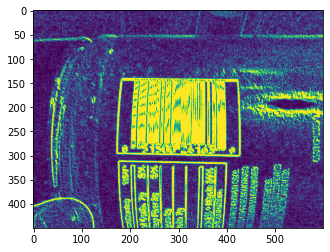

In [73]:
plt.imshow( gradient );

Сглаживаем градиентную картинку.

In [74]:
blurred = cv.blur(gradient, (9, 9))

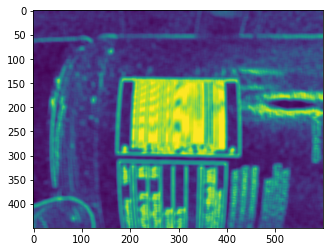

In [75]:
plt.imshow( blurred );

In [76]:
(_, thresh) = cv.threshold(blurred, 225, 255, cv.THRESH_BINARY)

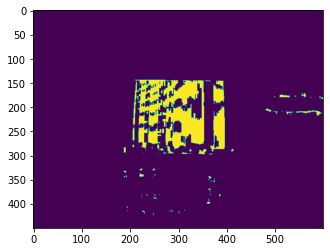

In [77]:
plt.imshow( thresh );

Применим операцию Close.\
**Close - это композиция dilate и erode c одним и тем же ядром.**
Если Open старается убрать мелкие детали, то Close наоборот старается закрасить мелкие дырки.

In [86]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (21, 7))
closed = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)

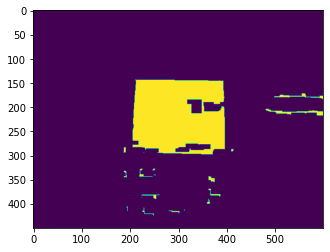

In [87]:
plt.imshow( closed );

Убираем мелкие связанные компоненты.

In [88]:
closed = cv.erode(closed, None, iterations = 4)
closed = cv.dilate(closed, None, iterations = 4)

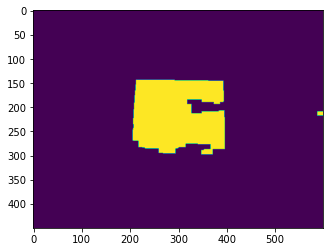

In [89]:
plt.imshow( closed );

<b>Через контуры</b>

Можно найти код через поиск контуров

In [90]:
(cnts, _) = cv.findContours(closed.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
c = sorted(cnts, key = cv.contourArea, reverse = True)[0]
rect = cv.minAreaRect(c)
rect

((301.660888671875, 220.238037109375),
 (190.53768920898438, 152.18447875976562),
 0.8184553980827332)

In [91]:
qq = image.copy()

In [92]:
box = np.int0(cv.boxPoints(rect))
cv.drawContours(qq, [box], -1, (0, 255, 0), 3);

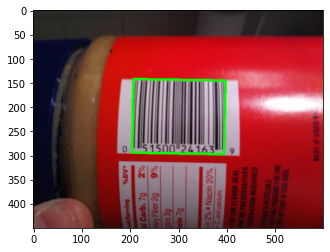

In [93]:
plt.imshow( qq );

<b>Через связанные компоненты</b>

In [98]:
reval, labels, stats, centroids = cv.connectedComponentsWithStats( closed ) # ищем связные компоненты
reval

3

3 компоненты: фон, маленький прямоугольник справа и бар код.

In [95]:
stats

array([[     0,      0,    600,    450, 245030],
       [   206,    144,    191,    154,  24862],
       [   588,    209,     12,      9,    108]], dtype=int32)

In [96]:
centroids

array([[299.45354038, 225.31612864],
       [298.68075778, 216.50651597],
       [593.5       , 213.        ]])

In [97]:
#  cv::CC_STAT_LEFT = 0,
#  cv::CC_STAT_TOP = 1,
#  cv::CC_STAT_WIDTH = 2,
#  cv::CC_STAT_HEIGHT = 3,
#  cv::CC_STAT_AREA = 4

# Проверим, что это 4 колонка.
cv.CC_STAT_AREA

4

Отсортируем по площади и возьмём вторую по площади фигуру.\
Это и будет бар код

In [99]:
c = sorted(stats, key = (lambda stat: stat[cv.CC_STAT_AREA]), reverse = True)[1]
c

array([  206,   144,   191,   154, 24862], dtype=int32)

In [100]:
qw = image.copy()

In [101]:
# Из 2 строки stats
cv.rectangle( qw, (206, 144), (206+191, 144+154), (0,0,255), 3 );

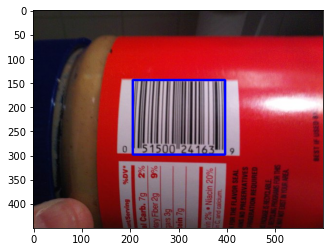

In [102]:
plt.imshow( qw );